# Статистический анализ данных

### Шаг 1. Открываем файлы с данными и изучаем общую информацию. 

In [1]:
#библиотеки
import pandas as pd
from IPython.display import display 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import random
import seaborn as sns

In [2]:
calls = pd.read_csv('/datasets/calls.csv' )
print('----calls----')
calls.info()
display(calls.sample(10))

----calls----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
73010,1183_374,2018-08-02,15.90,1183
72897,1183_261,2018-09-08,0.00,1183
163773,1402_596,2018-04-20,10.08,1402
46268,1115_370,2018-12-03,7.10,1115
123326,1318_325,2018-12-14,2.45,1318
183951,1456_423,2018-11-30,17.44,1456
37206,1093_484,2018-11-19,10.07,1093
89527,1224_444,2018-05-23,7.19,1224
183425,1455_507,2018-05-04,4.70,1455
80732,1200_635,2018-12-14,0.00,1200


In [3]:
internet = pd.read_csv('/datasets/internet.csv' )
print('----internet----')
internet.info()
display(internet.sample(10))

----internet----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
128286,128286,1429_444,103.69,2018-12-14,1429
39120,39120,1135_600,749.71,2018-11-06,1135
70115,70115,1239_136,121.88,2018-10-01,1239
134068,134068,1449_223,0.00,2018-11-01,1449
261,261,1001_50,0.00,2018-12-05,1001
31355,31355,1109_421,399.53,2018-07-11,1109
57403,57403,1191_199,632.12,2018-07-10,1191
129000,129000,1431_34,544.11,2018-10-08,1431
91283,91283,1308_466,481.20,2018-09-10,1308
96832,96832,1326_195,414.91,2018-11-12,1326


In [4]:
messages = pd.read_csv('/datasets/messages.csv' )
print('----messages----')
messages.info()
display(messages.sample(10))

----messages----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
116396,1472_700,2018-12-14,1472
8660,1033_411,2018-10-16,1033
49494,1218_87,2018-09-14,1218
20029,1089_32,2018-07-20,1089
32281,1144_420,2018-07-29,1144
6200,1026_134,2018-11-20,1026
89171,1373_183,2018-02-08,1373
16071,1067_505,2018-10-06,1067
88307,1369_232,2018-10-02,1369
113714,1460_395,2018-07-21,1460


In [5]:
tariffs = pd.read_csv('/datasets/tariffs.csv' )
print('----tariffs----')
tariffs.info()
display(tariffs)

----tariffs----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [6]:
users = pd.read_csv('/datasets/users.csv' )
print('----users----')
users.info()
display(users.head(10))

----users----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


### Выводы.
В качестве исходных данных клиентом предоставлены 5 файлов:
- файл с данными о звонках (4 столбца и 202607 строк). На первый взглят нет пропущенных данных.
- файл с данными о интернет-соединениях (5 столбцов и 149396 строк). На первый взгляд отсутствуют пропущенные значения, однако есть дублирующий столбец с индексами
- файл с данными об отправленных сообщениях (3 столбца и 123036 строк). На первый взглят нет пропущенных данных
- файл с данными о тарифах (8 столбцов и 2 строки). 
- файл с данными о клиентах (8 столбцов и 500 строк). Есть пропущенные данные в столбце о дате окончания использования тарифа.

Во всех таблицах столбцы с датами имеют тип object, в дальнейшем данные будут приобразованы в тип datetime64 для возможности проведения анализа ситуации с поведением клиентов. 

### Шаг 2. Предобработка данных

In [7]:
#Удаляем лишние столбцы, пустые значения заменяем на медианные
del internet['Unnamed: 0']
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


In [8]:
print(internet[internet['mb_used'] ==0]['mb_used'].count())
internet_median = internet['mb_used'].median()
internet = internet.fillna(internet_median)
internet.loc[internet['mb_used'] == 0, 'mb_used'] = internet_median
internet.duplicated().sum()
display(internet.head(10))
internet['mb_used'] = np.ceil(internet['mb_used']).astype(int) #округляем до ближайшего большего  целого числа
display(internet.head(10))

19598


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


,id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000
5,1000_5,400,2018-10-02,1000
6,1000_6,541,2018-09-07,1000
7,1000_7,416,2018-07-11,1000
8,1000_8,506,2018-10-08,1000
9,1000_9,346,2018-09-03,1000


In [9]:
#Пустые значения заменяем на медианные
print(calls[calls['duration'] ==0]['duration'].count())
calls_median = calls['duration'].median()
calls = calls.fillna(calls_median)
print('max', calls['duration'].max())
print('min', calls['duration'].min())
calls.duplicated().sum()
calls['duration'] = np.ceil(calls['duration']).astype(int) #округляем до ближайшего большего  целого числа
display(calls.tail(10))

39613
max 38.0
min 0.0


,id,call_date,duration,user_id
202597,1499_210,2018-10-02,9,1499
202598,1499_211,2018-12-29,5,1499
202599,1499_212,2018-12-30,2,1499
202600,1499_213,2018-10-17,11,1499
202601,1499_214,2018-12-05,3,1499
202602,1499_215,2018-12-26,1,1499
202603,1499_216,2018-10-18,19,1499
202604,1499_217,2018-11-10,11,1499
202605,1499_218,2018-10-06,5,1499
202606,1499_219,2018-12-14,20,1499


In [10]:
#превращаем столбцы user_id  и  id в индекс
index_columns = [calls, internet, messages]
for table in index_columns:
    table.set_index(['user_id', 'id'],inplace=True)
    
users.set_index('user_id',inplace=True)

In [11]:
#объединяем таблицы
data = calls.join([internet,messages]) 
display(data.head(10))

call_date  duration  mb_used session_date message_date
user_id id                                                             
1000    1000_0  2018-07-25       0.0    113.0   2018-11-25   2018-06-27
        1000_1  2018-08-17       0.0   1053.0   2018-09-07   2018-10-08
        1000_2  2018-06-11       3.0   1198.0   2018-06-25   2018-08-04
        1000_3  2018-09-21      14.0    551.0   2018-08-22   2018-06-16
        1000_4  2018-12-15       6.0    303.0   2018-09-24   2018-12-05
        1000_5  2018-11-02       0.0    400.0   2018-10-02   2018-06-20
        1000_6  2018-10-18       0.0    541.0   2018-09-07   2018-11-19
        1000_7  2018-08-22      19.0    416.0   2018-07-11   2018-10-29
        1000_8  2018-09-15      19.0    506.0   2018-10-08   2018-06-25
        1000_9  2018-08-15       0.0    346.0   2018-09-03   2018-12-18

In [12]:
data = data.join(users, on='user_id') 
display(data.head(10))

call_date  duration  mb_used session_date message_date  age  \
user_id id                                                                     
1000    1000_0  2018-07-25       0.0    113.0   2018-11-25   2018-06-27   52   
        1000_1  2018-08-17       0.0   1053.0   2018-09-07   2018-10-08   52   
        1000_2  2018-06-11       3.0   1198.0   2018-06-25   2018-08-04   52   
        1000_3  2018-09-21      14.0    551.0   2018-08-22   2018-06-16   52   
        1000_4  2018-12-15       6.0    303.0   2018-09-24   2018-12-05   52   
        1000_5  2018-11-02       0.0    400.0   2018-10-02   2018-06-20   52   
        1000_6  2018-10-18       0.0    541.0   2018-09-07   2018-11-19   52   
        1000_7  2018-08-22      19.0    416.0   2018-07-11   2018-10-29   52   
        1000_8  2018-09-15      19.0    506.0   2018-10-08   2018-06-25   52   
        1000_9  2018-08-15       0.0    346.0   2018-09-03   2018-12-18   52   

               churn_date       city first_name  last_name    reg_date tariff  
user_id id                                                                     
1000    1000_0        NaN  Краснодар     Рафаил  Верещагин  2018-05-25  ultra  
        1000_1        NaN  Краснодар     Рафаил  Верещагин  2018-05-25  ultra  
        1000_2        NaN  Краснодар     Рафаил  Верещагин  2018-05-25  ultra  
        1000_3        NaN  Краснодар     Рафаил  Верещагин  2018-05-25  ultra  
        1000_4        NaN  Краснодар     Рафаил  Верещагин  2018-05-25  ultra  
        1000_5        NaN  Краснодар     Рафаил  Верещагин  2018-05-25  ultra  
        1000_6        NaN  Краснодар     Рафаил  Верещагин  2018-05-25  ultra  
        1000_7        NaN  Краснодар     Рафаил  Верещагин  2018-05-25  ultra  
        1000_8        NaN  Краснодар     Рафаил  Верещагин  2018-05-25  ultra  
        1000_9        NaN  Краснодар     Рафаил  Верещагин  2018-05-25  ultra

In [13]:
data = data.reset_index()
#переименуем столбцы исходного файла с тарифами для последующего соединения в общую таблицу
tariffs.rename(columns = {'tariff_name': 'tariff'}, inplace=True)
tariffs.set_index(['tariff'],inplace=True)
data.set_index(['tariff'],inplace=True)
data = data.join(tariffs, on='tariff') 

#индексы возвращаем в столбцы
data = data.reset_index()
display(data.sample(10))
data.duplicated().sum()



,tariff,user_id,id,call_date,duration,mb_used,session_date,message_date,age,churn_date,...,first_name,last_name,reg_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
156913,smart,1388,1388_73,2018-09-01,3.0,962.0,2018-11-27,NaN,24,NaN,...,Рустам,Левин,2018-08-27,50,15360,500,550,200,3,3
18666,smart,1051,1051_55,2018-09-24,3.0,512.0,2018-08-30,NaN,37,2018-10-14,...,Кристина,Сомова,2018-05-28,50,15360,500,550,200,3,3
497,smart,1002,1002_7,2018-12-22,9.0,656.0,2018-09-01,2018-12-11,59,NaN,...,Евгений,Абрамович,2018-06-17,50,15360,500,550,200,3,3
121235,smart,1313,1313_199,2018-12-11,9.0,NaN,NaN,NaN,56,NaN,...,Онисим,Суслов,2018-10-24,50,15360,500,550,200,3,3
186553,smart,1460,1460_471,2018-09-06,11.0,NaN,NaN,NaN,64,NaN,...,Арина,Абашкина,2018-04-06,50,15360,500,550,200,3,3
96964,smart,1247,1247_287,2018-05-29,1.0,533.0,2018-11-18,NaN,19,NaN,...,Адам,Тарасов,2018-05-23,50,15360,500,550,200,3,3
137496,ultra,1352,1352_220,2018-06-06,9.0,519.0,2018-05-23,NaN,53,NaN,...,Кристина,Румянцева,2018-04-17,1000,30720,3000,1950,150,1,1
192543,smart,1472,1472_356,2018-01-18,5.0,233.0,2018-06-29,2018-10-13,53,NaN,...,Наида,Боброва,2018-01-18,50,15360,500,550,200,3,3
114256,ultra,1292,1292_13,2018-08-07,8.0,454.0,2018-07-30,NaN,63,NaN,...,Веселина,Алексеенко,2018-02-21,1000,30720,3000,1950,150,1,1
67985,smart,1172,1172_190,2018-11-13,6.0,271.0,2018-11-16,NaN,40,NaN,...,Алан,Карасев,2018-05-05,50,15360,500,550,200,3,3


0

In [14]:
#обработка столбцов с датами
date_columns = ['call_date', 'session_date', 'message_date', 'churn_date','reg_date']
for column in date_columns:
    data[column] = pd.to_datetime(data[column], format = '%Y-%m-%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 21 columns):
tariff                   202607 non-null object
user_id                  202607 non-null int64
id                       202607 non-null object
call_date                202607 non-null datetime64[ns]
duration                 202607 non-null float64
mb_used                  131861 non-null float64
session_date             131861 non-null datetime64[ns]
message_date             99404 non-null datetime64[ns]
age                      202607 non-null int64
churn_date               9919 non-null datetime64[ns]
city                     202607 non-null object
first_name               202607 non-null object
last_name                202607 non-null object
reg_date                 202607 non-null datetime64[ns]
messages_included        202607 non-null int64
mb_per_month_included    202607 non-null int64
minutes_included         202607 non-null int64
rub_monthly_fee          202607 non-nul

In [15]:
data.loc[data['mb_used'].isna() == True, 'mb_used'] = internet_median
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 21 columns):
tariff                   202607 non-null object
user_id                  202607 non-null int64
id                       202607 non-null object
call_date                202607 non-null datetime64[ns]
duration                 202607 non-null float64
mb_used                  202607 non-null float64
session_date             131861 non-null datetime64[ns]
message_date             99404 non-null datetime64[ns]
age                      202607 non-null int64
churn_date               9919 non-null datetime64[ns]
city                     202607 non-null object
first_name               202607 non-null object
last_name                202607 non-null object
reg_date                 202607 non-null datetime64[ns]
messages_included        202607 non-null int64
mb_per_month_included    202607 non-null int64
minutes_included         202607 non-null int64
rub_monthly_fee          202607 non-nul

#### Подготовка к дальнейшему анализу данных
Посчитаем для каждого пользователя:

- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя

In [16]:
date_columns = {'call_date_month':'call_date', 'internet_date_month':'session_date', 'message_date_month':'message_date'}
for k, v in date_columns.items():
    data[k] = pd.DatetimeIndex(data[v]).month

for k, v in date_columns.items():
    data[k] = data[k].fillna(0)

data['internet_date_month'] = data['internet_date_month'].astype('int')
data['message_date_month'] = data['message_date_month'].astype('int')

display(data.sample(10))
data.info()

,tariff,user_id,id,call_date,duration,mb_used,session_date,message_date,age,churn_date,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,call_date_month,internet_date_month,message_date_month
97527,smart,1248,1248_370,2018-09-28,2.0,248.000,2018-09-03,NaT,51,NaT,...,50,15360,500,550,200,3,3,9,9,0
95994,smart,1244,1244_249,2018-09-05,3.0,69.000,2018-05-29,2018-08-03,68,NaT,...,50,15360,500,550,200,3,3,9,5,8
48026,ultra,1120,1120_127,2018-03-27,10.0,334.000,2018-10-12,NaT,25,NaT,...,1000,30720,3000,1950,150,1,1,3,10,0
8459,ultra,1021,1021_927,2018-08-13,0.0,348.015,NaT,NaT,61,NaT,...,1000,30720,3000,1950,150,1,1,8,0,0
17952,ultra,1049,1049_307,2018-07-09,0.0,348.015,NaT,NaT,41,NaT,...,1000,30720,3000,1950,150,1,1,7,0,0
200349,smart,1494,1494_11,2018-10-11,6.0,682.000,2018-11-23,NaT,62,NaT,...,50,15360,500,550,200,3,3,10,11,0
41084,smart,1101,1101_127,2018-10-22,1.0,505.000,2018-11-12,NaT,27,NaT,...,50,15360,500,550,200,3,3,10,11,0
46512,smart,1116,1116_242,2018-05-14,3.0,150.000,2018-07-25,NaT,65,NaT,...,50,15360,500,550,200,3,3,5,7,0
189864,ultra,1467,1467_131,2018-12-22,10.0,348.015,NaT,NaT,66,NaT,...,1000,30720,3000,1950,150,1,1,12,0,0
133057,ultra,1341,1341_287,2018-09-22,4.0,202.000,2018-07-25,2018-07-25,71,NaT,...,1000,30720,3000,1950,150,1,1,9,7,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 24 columns):
tariff                   202607 non-null object
user_id                  202607 non-null int64
id                       202607 non-null object
call_date                202607 non-null datetime64[ns]
duration                 202607 non-null float64
mb_used                  202607 non-null float64
session_date             131861 non-null datetime64[ns]
message_date             99404 non-null datetime64[ns]
age                      202607 non-null int64
churn_date               9919 non-null datetime64[ns]
city                     202607 non-null object
first_name               202607 non-null object
last_name                202607 non-null object
reg_date                 202607 non-null datetime64[ns]
messages_included        202607 non-null int64
mb_per_month_included    202607 non-null int64
minutes_included         202607 non-null int64
rub_monthly_fee          202607 non-nul

In [17]:
#количество сделанных звонков и израсходованных минут разговора по месяцам
data_pivot_call = data.pivot_table(
    index = ['user_id','call_date_month'], values ='duration', aggfunc = ['sum','count'])
data_pivot_call.rename_axis(['user_id', 'month'], axis='index', inplace=True)
display(data_pivot_call.head(10))


#количество отправленных сообщений по месяцам
data_pivot_message = data.pivot_table(
    index = ['user_id','message_date_month'], values ='id', aggfunc = 'count')
data_pivot_message.rename_axis(['user_id', 'month'], axis='index', inplace=True)
display(data_pivot_message.head(10))

#объем израсходованного интернет-трафика по месяцам;
data_pivot_internet = data.pivot_table(
    index = ['user_id','internet_date_month'], values ='mb_used', aggfunc = 'sum')

data_pivot_internet.rename_axis(['user_id', 'month'], axis='index', inplace=True)
display(data_pivot_internet.head(10))


sum    count
              duration duration
user_id month                  
1000    5        159.0       22
        6        172.0       43
        7        340.0       47
        8        408.0       52
        9        466.0       58
        10       350.0       57
        11       338.0       43
        12       333.0       46
1001    11       430.0       59
        12       414.0       63

id
user_id month     
1000    5       15
        6       45
        7       57
        8       62
        9       42
        10      48
        11      46
        12      53
1001    0      122
1002    0      147

mb_used
user_id month           
1000    0      54638.355
        5       2605.000
        6      25002.000
        7      14365.000
        8      14768.000
        9      15279.000
        10     14717.000
        11     15117.000
        12     10525.000
1001    0       9048.390

In [18]:
data_pivot = data_pivot_call.join([data_pivot_internet, data_pivot_message], how= 'outer')
data_pivot = data_pivot.reset_index('month')

# отбираем данные, в которых нет пропусков в столбце 'month'
data_pivot = data_pivot.query('month >0')

# для удобства переименуем столбцы'
data_pivot.set_axis(['month', 'min_month', 'call_month', 'mb_month', 'message_month'], 
                                 axis = 'columns', inplace=True)
#добавим данные о регионе каждого клиента
users_pivot = users['city']
data_pivot = data_pivot.join(users_pivot, how = 'outer')

#пропущенные данные заполняем 0(возможно клиенты не пользовались услугами)
data_pivot = data_pivot.fillna(0)
display(data_pivot.head(20))

,month,min_month,call_month,mb_month,message_month,city
user_id,,,,,,
1000,5.0,159.0,22.0,2605.0,15.0,Краснодар
1000,6.0,172.0,43.0,25002.0,45.0,Краснодар
1000,7.0,340.0,47.0,14365.0,57.0,Краснодар
1000,8.0,408.0,52.0,14768.0,62.0,Краснодар
1000,9.0,466.0,58.0,15279.0,42.0,Краснодар
1000,10.0,350.0,57.0,14717.0,48.0,Краснодар
1000,11.0,338.0,43.0,15117.0,46.0,Краснодар
1000,12.0,333.0,46.0,10525.0,53.0,Краснодар
1001,11.0,430.0,59.0,21244.0,0.0,Москва


In [19]:
#подсчет помесячной выручки с каждого пользователя

#вставляем в сводную таблицу данные о тарифе каждого клиента
data_users = users['tariff']
data_pivot = data_pivot.join(data_users, on = 'user_id')

data_pivot = data_pivot.reset_index()
display(data_pivot.tail(20))

#объединяем сводную таблицу с tariffs
data_pivot.set_index(['tariff'],inplace=True)
data_pivot = data_pivot.join(tariffs)
data_pivot = data_pivot.reset_index()
display(data_pivot.head(20))


,user_id,month,min_month,call_month,mb_month,message_month,city,tariff
3164,1496,4.0,521.0,67.0,25719.0,49.0,Вологда,smart
3165,1496,5.0,484.0,63.0,27579.0,40.0,Вологда,smart
3166,1496,6.0,555.0,74.0,23819.0,35.0,Вологда,smart
3167,1496,7.0,582.0,73.0,28234.0,42.0,Вологда,smart
3168,1496,8.0,527.0,88.0,26701.0,41.0,Вологда,smart
3169,1496,9.0,486.0,68.0,31158.0,29.0,Вологда,smart
3170,1496,10.0,450.0,72.0,32201.0,35.0,Вологда,smart
3171,1496,11.0,662.0,80.0,32072.0,46.0,Вологда,smart
3172,1496,12.0,518.0,80.0,25294.0,51.0,Вологда,smart
3173,1497,10.0,490.0,66.0,12908.0,20.0,Челябинск,smart


,tariff,user_id,month,min_month,call_month,mb_month,message_month,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,smart,1001,11.0,430.0,59.0,21244.0,0.0,Москва,50,15360,500,550,200,3,3
1,smart,1001,12.0,414.0,63.0,16147.0,0.0,Москва,50,15360,500,550,200,3,3
2,smart,1002,6.0,117.0,15.0,9534.0,4.0,Стерлитамак,50,15360,500,550,200,3,3
3,smart,1002,7.0,214.0,26.0,11554.0,11.0,Стерлитамак,50,15360,500,550,200,3,3
4,smart,1002,8.0,289.0,42.0,13521.0,13.0,Стерлитамак,50,15360,500,550,200,3,3
5,smart,1002,9.0,206.0,36.0,11193.0,4.0,Стерлитамак,50,15360,500,550,200,3,3
6,smart,1002,10.0,212.0,33.0,8508.0,10.0,Стерлитамак,50,15360,500,550,200,3,3
7,smart,1002,11.0,243.0,32.0,14887.0,16.0,Стерлитамак,50,15360,500,550,200,3,3
8,smart,1002,12.0,236.0,33.0,14078.0,12.0,Стерлитамак,50,15360,500,550,200,3,3
9,smart,1005,1.0,95.0,15.0,2730.0,7.0,Набережные Челны,50,15360,500,550,200,3,3


In [20]:

data_pivot['month_revenue'] = round(((data_pivot['min_month'] - data_pivot['minutes_included'])\
                               * data_pivot['rub_per_minute']) + ((data_pivot['mb_month']\
                                - data_pivot['mb_per_month_included'])/1024 * data_pivot['rub_per_gb'])\
                                + ((data_pivot['message_month'] - data_pivot['messages_included'])\
                                   * data_pivot['rub_per_message']) + data_pivot['rub_monthly_fee'], 2)

#проверка и исправление искаженных значений
data_pivot.loc[data_pivot['month_revenue'] < data_pivot['rub_monthly_fee'],
               'month_revenue'] = data_pivot['rub_monthly_fee']
                     
np.ceil(data_pivot[['min_month','call_month', 'month', 'mb_month','message_month', 'month_revenue']]).astype(int)
data_pivot['month'] = data_pivot['month'].astype(int)
display(data_pivot.tail(20))
data_pivot.info()

,tariff,user_id,month,min_month,call_month,mb_month,message_month,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month_revenue
3164,ultra,1476,10,540.0,68.0,25846.0,4.0,Москва,1000,30720,3000,1950,150,1,1,1950.0
3165,ultra,1476,11,556.0,71.0,15121.0,6.0,Москва,1000,30720,3000,1950,150,1,1,1950.0
3166,ultra,1476,12,588.0,81.0,14834.0,11.0,Москва,1000,30720,3000,1950,150,1,1,1950.0
3167,ultra,1485,12,584.0,94.0,24494.0,94.0,Киров,1000,30720,3000,1950,150,1,1,1950.0
3168,ultra,1491,4,143.0,17.0,3626.0,10.0,Челябинск,1000,30720,3000,1950,150,1,1,1950.0
3169,ultra,1491,5,530.0,81.0,25047.0,55.0,Челябинск,1000,30720,3000,1950,150,1,1,1950.0
3170,ultra,1491,6,424.0,68.0,15981.0,56.0,Челябинск,1000,30720,3000,1950,150,1,1,1950.0
3171,ultra,1491,7,606.0,80.0,21265.0,58.0,Челябинск,1000,30720,3000,1950,150,1,1,1950.0
3172,ultra,1491,8,611.0,74.0,18342.0,49.0,Челябинск,1000,30720,3000,1950,150,1,1,1950.0
3173,ultra,1491,9,531.0,77.0,15830.0,52.0,Челябинск,1000,30720,3000,1950,150,1,1,1950.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3184 entries, 0 to 3183
Data columns (total 16 columns):
tariff                   3184 non-null object
user_id                  3184 non-null int64
month                    3184 non-null int64
min_month                3184 non-null float64
call_month               3184 non-null float64
mb_month                 3184 non-null float64
message_month            3184 non-null float64
city                     3184 non-null object
messages_included        3184 non-null int64
mb_per_month_included    3184 non-null int64
minutes_included         3184 non-null int64
rub_monthly_fee          3184 non-null int64
rub_per_gb               3184 non-null int64
rub_per_message          3184 non-null int64
rub_per_minute           3184 non-null int64
month_revenue            3184 non-null float64
dtypes: float64(5), int64(9), object(2)
memory usage: 398.1+ KB


### Выводы.
В предобработке избавляемся от пропущенных данных и лишнего столбц в исходных таблицах. Далее объединяем таблицы для понимания общей картины. Объединение проеисходит в несколько этапов:
- превращаем общие столбцы таблиц в индексы(`user_id` и `id`) - это нам позволит безошибочно склеить сооответствующие строки
- склеивание выполняем по индексам методом join() от таблицы с самым большим количеством строк к таблице с нименьшим 
- далее сбрасываем индексы и превращаем в индекс столбцы `tariff`
- выполняем склеивание по новым индексам последней таблицы с общей
- сбрасываем индексы для возможности дальнейшего использования столбца `tariff`. Процесс объединения таблиц на этом завершается

После объединения таблиц проводим следующий этап предобработки. Столбцы с датами из типа object приобразовываем в тип datetime64, Избаляемся от пропусков.

Готовимся к дальнейшему анализу данных. Для этого делаем подсчет для каждого пользователя количества сделанных звонков и израсходованных минут разговора по месяцам, количества отправленных сообщений по месяцам, объема израсходованного интернет-трафика по месяцам, помесячной выручки с каждого.Для расчета из столбцов типа datetime64 соответствующих данных в новые стобцы получаем номер месяца.Методом сводных таблиц pivot_table() получаем необходимые данные и производим расчеты. Для выборки в сводную таблицу отбираем данные, которые не имеют пропусков в датах поскольку дальнейшая работа с отсутвием данных в этих столбцах будет невозможной.
Детально изучив стобец с выручкой видим:
- положительные значения - выручка компании
- отрицательные значения - это значит, что клиенты не полностью расходуют, включенные в тариф услуги и выручка компании будет     более стоимости абонентской платы. Проверяем столбец на наличие данных меньше абонентской платы и изменяем на минимальную       выручку(стоимость абонентской платы)

### Шаг 3. Анализ данных

Text(0.5, 1, 'Кол-во минут тарифа в месяц')

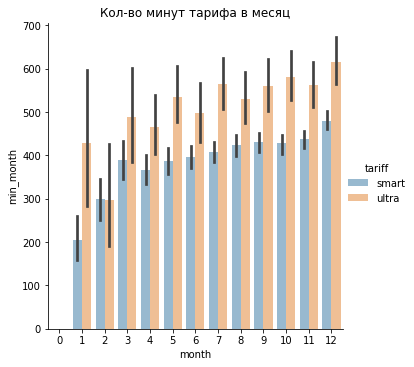

In [21]:
# Гистограммы по выборке

# Кол-во минут разговора каждого тарифа в месяц
sns.catplot(data=data_pivot, kind='bar',
    x= 'month', y='min_month', hue='tariff',
    alpha= 0.5)

plt.title('Кол-во минут тарифа в месяц')

Text(0.5, 1, 'Кол-во сообщений тарифа в месяц')

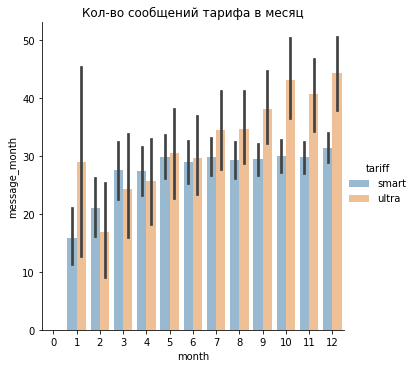

In [22]:
# Кол-во сообщений каждого тарифа в месяц
sns.catplot(data=data_pivot, kind='bar',
    x= 'month', y='message_month', hue='tariff',
    alpha= 0.5)

plt.title('Кол-во сообщений тарифа в месяц')

Text(0.5, 1, 'Объем трафика тарифа в месяц')

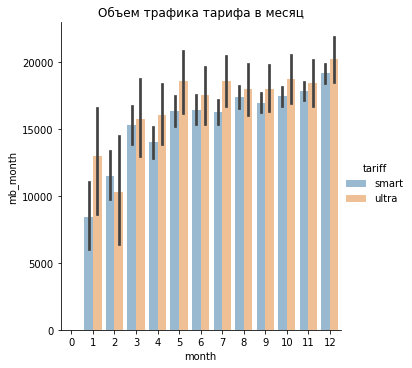

In [23]:
# Объем трафика по каждому каждого тарифа в месяц
sns.catplot(data=data_pivot, kind='bar',
    x= 'month', y='mb_month', hue='tariff',
    alpha= 0.5)

plt.title('Объем трафика тарифа в месяц')

Text(0.5, 1, 'Выручка по тарифу в месяц')

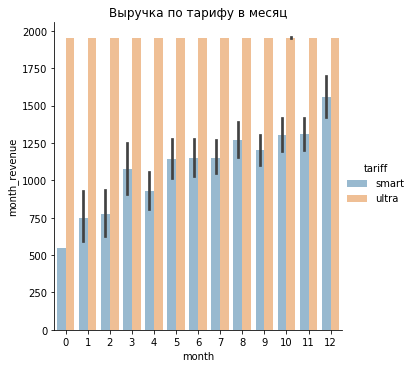

In [24]:
# Выручка по каждому тарифу в месяц

sns.catplot(data=data_pivot, kind='bar',
    x= 'month', y='month_revenue', hue='tariff',
    alpha= 0.5)

plt.title('Выручка по тарифу в месяц')

In [25]:
# Подсчет среднего количества, дисперсии и стандартного отклонения
mean_var_sqrt = data_pivot.pivot_table(index = 'tariff', 
                                       values = ['min_month',
                                                 'message_month', 
                                                 'mb_month'], aggfunc = [np.mean, np.var])

mean_var_sqrt.set_axis(['mean_mb', 'mean_message', 
                        'mean_min', 'var_mb', 
                        'var_message', 'var_min'], 
                       axis = 'columns', inplace=True)

mean_var_sqrt['sqrt_mb'] = np.sqrt(mean_var_sqrt['var_mb'])
mean_var_sqrt['sqrt_message'] = np.sqrt(mean_var_sqrt['var_message'])
mean_var_sqrt['sqrt_min'] = np.sqrt(mean_var_sqrt['var_min'])                                    
display(mean_var_sqrt)

,mean_mb,mean_message,mean_min,var_mb,var_message,var_min,sqrt_mb,sqrt_message,sqrt_min
tariff,,,,,,,,,
smart,16903.451932,29.205750,418.498203,4.551256e+07,547.123491,36032.323817,6746.299969,23.390671,189.821821
ultra,17964.936326,35.899791,541.465553,9.966333e+07,1179.793500,95674.658687,9983.152386,34.348122,309.313205


### Выводы.

Анализируя выборку, можно оценить поведение клиентов в зависимости от тарифа:
- пользователи тарифа 'smart' в среднем в месяц разговаривают 400 минут, 
  отправляют около 30 сообщений и тратят 15Гб интернет-трафика
- пользователи тарифа 'ultra' в месяц тратят около  540 минут на разговоры, 
  отправляют 36 сообщений и расходуют 16,5 Гб интернета
  
Посчитав дисперсию по каждой статье расхода тарифа, получили весьма существенные цифры. Да, в данном иследовнии они имеют место быть. Современные мобильные пользователи в силу возраста и привычек выбирают средства связи исходя из личного комфорта: некоторым удобнее использовать звонки на номера телефонов, а некоторым звонки через интернет-трафик в мессенджеры.   



### Шаг 4. Проверьте гипотезы

In [26]:
#проверка гипотезы: средняя выручка пользователей тарифов «ultra» и «smart» различается

# ultra
tariff_ultra_hypothesis_total =  round(data_pivot.query('tariff == "ultra"'))

print('Кол-во элементов в выборке тарифа ultra',
      len(tariff_ultra_hypothesis_total)) #проверка количества элементов в выборке

tariff_ultra_hypothesis = tariff_ultra_hypothesis_total['month_revenue']


# smart
tariff_smart_hypothesis_total =  round(data_pivot.query('tariff == "smart"'))
print('Кол-во элементов в выборке тарифа smart',
      len(tariff_smart_hypothesis_total)) #проверка количества элементов в выборке
print()

tariff_smart_hypothesis = tariff_smart_hypothesis_total['month_revenue']

# Дисперсии выборок
variance_estimate_ultra = np.var(tariff_ultra_hypothesis, ddof=1)
print('Дисперсия выборки ultra',variance_estimate_ultra) 

variance_estimate_smart = np.var(tariff_smart_hypothesis, ddof=1)
print('Дисперсия выборки smart',variance_estimate_smart) 
print()

# T-критерий Стьюдента
results = st.ttest_ind(tariff_smart_hypothesis, tariff_ultra_hypothesis, equal_var = False)
print('p-значение:', results.pvalue)
print()  

alpha = 0.1


if (results.pvalue < alpha):
    print("Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается")
else:
    print("Cредняя выручка пользователей тарифов «Ультра» и «Смарт» не различается")

Кол-во элементов в выборке тарифа ultra 958
Кол-во элементов в выборке тарифа smart 2226

Дисперсия выборки ultra 123.52400835073068
Дисперсия выборки smart 907564.7029714205

p-значение: 9.21628646232882e-215

Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается


In [27]:
#проверка гипотезы: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов


# Москва

region_hypothesis_moscow_total =  round(data_pivot.query('city == "Москва"'))
print('Кол-во элементов в выборке региона Москва',
      len(region_hypothesis_moscow_total)) #проверка количества элементов в выборке

region_hypothesis_moscow = region_hypothesis_moscow_total['month_revenue']

# остальные регионы
region_hypothesis_regions_total =  round(data_pivot.query('city != "Москва"'))
print('Кол-во элементов в выборке остальные регионы',
      len(region_hypothesis_regions_total)) #проверка количества элементов в выборке
print()

region_hypothesis_regions = region_hypothesis_regions_total['month_revenue']

# Дисперсии выборок
variance_estimate_moscow = np.var(region_hypothesis_moscow, ddof=1)
print('Дисперсия выборки Москва',variance_estimate_moscow) 

variance_estimate_regions = np.var(region_hypothesis_regions, ddof=1)
print('Дисперсия выборки другие регионы',variance_estimate_regions) 
print()

# T-критерий Стьюдента
results = st.ttest_ind(region_hypothesis_moscow, region_hypothesis_regions, equal_var = False)
if (results.pvalue < alpha):
    print("Cредняя выручка по Москве и другим регионам различается")
else:
    print("Cредняя выручка по Москве и другим регионам не различается")
print('p-значение:', results.pvalue)    

Кол-во элементов в выборке региона Москва 611
Кол-во элементов в выборке остальные регионы 2573

Дисперсия выборки Москва 658370.0998524321
Дисперсия выборки другие регионы 759511.5096026508

Cредняя выручка по Москве и другим регионам не различается
p-значение: 0.7790319498507667


In [29]:
region_hypothesis_moscow

0       1339.0
1        550.0
32       550.0
33      1802.0
34       761.0
         ...  
3162    1950.0
3163    1950.0
3164    1950.0
3165    1950.0
3166    1950.0
Name: month_revenue, Length: 611, dtype: float64

### Выводы.
Гипотеза что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается подтвердилась. Для докозательства использовалась гипотеза о равенстве средних двух генеральных совокупностей. В качестве критериев бралась выборка средней выручки для каждого тарифа.

Гипотеза что средняя выручка пользователей из Москвы отличается от выручки пользователей из других не подтверждается. Для докозательства использовалась гипотеза о равенстве средних двух генеральных совокупностей. В качестве критериев бралась выборка средней выручки Москвы и остальных регионов.

Пороговое значение alpha задавалось высокое (0.1) из-за маленькой выборки и большой вероятности погрешноти.



### Шаг 5. Общий вывод

В ходе работы над проектом смогли ответить на ряд поставленных вопросов:
1. Средняя выручка от тарифа «Ультра» больше, чем «Смарт».
Для определения ситуации с прибыльностью тарифов использовались гистограммы. На гистограмме четко определяетчся финансовое преимущество тарифа  «Ультра», над тарифом «Смарт». Также в качестве подтверждения использовался статистический инструмент проверки гипотезы. 
2. Средняя выручка по Москве и в остальных регионах не различается. Данная гипотиза позволяет судить о том, что Москва является крупнейшим потребителем услуг, который в состоянии дать половину от общей выручки в стране. И возможно именно в этом регионе реклама принесет наибольший финансовый результат.
3. Данное исследование дало возможность оценить "популярность" услуг каждого тарифа. Основной услугой тарифа "Ультра" является предоставление интернтет-трафика и звонки с мобильного телефона. Для тарифа "Смарт" лидером услугой оказалис sms-сообщения, на втором месте звонки с мобильного телефона. Дисперсия по каждой статье расхода тарифа, получилась весьма существенная. Учитывая специфику услуг, в данном иследовнии она имеет место быть. Современные мобильные пользователи в силу возраста и привычек выбирают средства связи исходя из личного комфорта: некоторым удобнее использовать звонки на номера телефонов, а некоторым звонки через интернет-трафик в мессенджеры.

